<a href="https://www.kaggle.com/code/danish1987/loan-approval-pre?scriptVersionId=203966607" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
df_sub   = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')
df_org =   pd.read_csv('/kaggle/input/loan-org-dataset/credit_risk_dataset.csv')

In [3]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
df_sub.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [5]:
df_org.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
# df_train = pd.concat([df_train,df_org],axis=0)

In [7]:
df_train.shape,df_test.shape

((58645, 13), (39098, 12))

In [8]:
df_train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [9]:
df_train['loan_int_rate'] = df_train['loan_int_rate'].fillna(df_train['loan_int_rate'].mean())
df_train['person_emp_length'] = df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean())

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

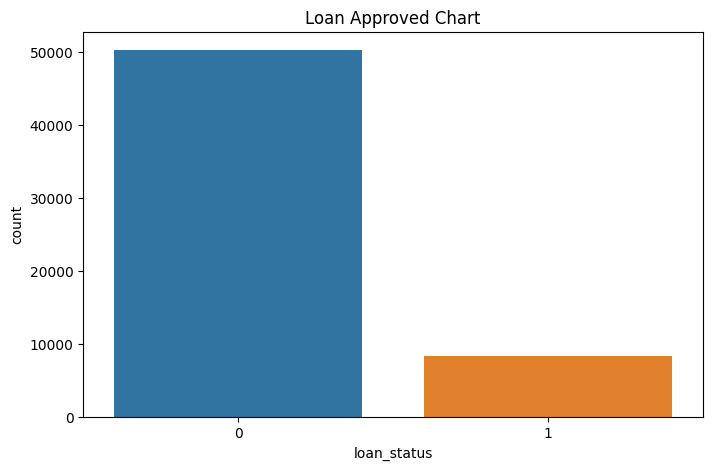

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='loan_status',data = df_train)
plt.title("Loan Approved Chart")
plt.show()

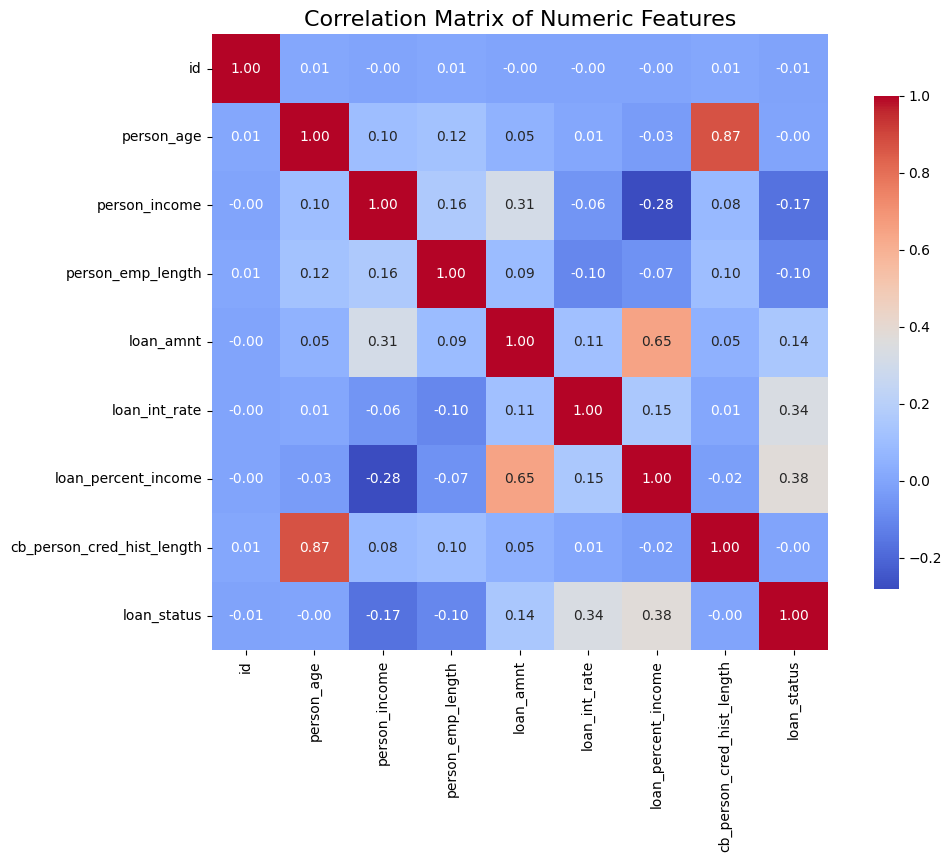

In [12]:
numeric_data = df_train.select_dtypes([float, int])

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Calculate the correlation matrix
corr = numeric_data.corr()

# Create a heatmap for the correlation matrix
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix of Numeric Features', fontsize=16)

# Show the plot
plt.show()

In [13]:
df_train = pd.get_dummies(df_train,drop_first=True)
X  =  df_train.drop('loan_status',axis=1)
y  = df_train['loan_status']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model with the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)
print('Accuracy_Score',accuracy_score(y_test,y_pred))

Accuracy_Score 0.9510614715662035


In [17]:
print('classification Report', classification_report(y_test,y_pred))

classification Report               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.91      0.72      0.80      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729



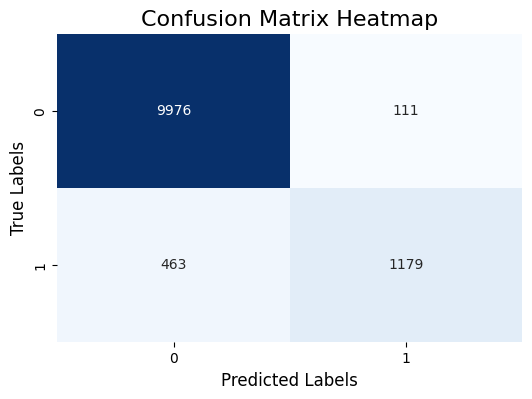

In [18]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

## Now Check the output on give test data

In [19]:
df_test = pd.get_dummies(df_test,drop_first=True)
y_pred  = model.predict(df_test)

In [20]:
submission = pd.DataFrame({'id':df_test['id'],'loan_status':y_pred})
submission.to_csv('submission.csv',index=False)